In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [180]:
!pip install bing_image_downloader

In [182]:
#Importing All libararies
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from bing_image_downloader import downloader
from PIL import Image
import sys

In [ ]:
# #Making data sets
# object = ['bed','car','chair','desk','door','laptop','mug','stair','window','television']
# for i in object:
#     downloader.download(i, limit=200,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60000)

In [ ]:
# #Changing the names of images to a unique image
# dir1 = '/Users/utkarshmittal/Desktop/Education/Plaksha/Term 3/ML Lab2/dataset/'
# for dirname in os.listdir(dir1):
#     if os.path.isdir(dir1+dirname):
#         for i, filename in enumerate(os.listdir(dir1+dirname)):
#             if filename.split('.')[1]=='jpg':
#                 os.rename(dir1+'/'+dirname + "/" + filename, dir1+'/'+dirname + "/" + dirname+'_'+str(i) + ".jpg")

In [ ]:
# #Checking for images which might not open or are corrupted
# bad_list=[]
# dir1 = '/Users/utkarshmittal/Desktop/Education/Plaksha/Term 3/ML Lab2/dataset/'
# for dirname in os.listdir(dir1):
#     if os.path.isdir(dir1+dirname):
#         for i, filename in enumerate(os.listdir(dir1+dirname)):
#             if filename.split('.')[1]=='jpg':
#                     try:
#                         img=cv2.imread(dir1+dirname+'/'+filename)
#                         size=img.shape
#                     except:
#                         print(dir1+dirname+'/'+filename)
#                         bad_list.append(dir1+dirname+'/'+filename)

In [ ]:
# #Reducing the pixel size of all images to 200*200


# path = '/Users/utkarshmittal/Desktop/Education/Plaksha/Term 3/ML Lab2/dataset/'
# dirs = os.listdir( path )
# for dirname in dirs:
#     if dirname!='.DS_Store':
#         for item in os.listdir( path+dirname ):
#             if item.split('.')[1]=='jpg':
#                 try:
#                     if os.path.isfile(path+dirname+'/'+item):
#                         im = Image.open(path+dirname+'/'+item)
#                         f, e = os.path.splitext(path+item)
#                         imResize = im.resize((200,200), Image.ANTIALIAS)
#                         imResize.save(path+dirname+'/'+item, quality=90)
#                 except:
#                     continue

In [ ]:
# #Again Checking for images which might not open or are corrupted
# bad_list=[]
# dir1 = '/Users/utkarshmittal/Desktop/Education/Plaksha/Term 3/ML Lab2/dataset/'
# for dirname in os.listdir(dir1):
#     if os.path.isdir(dir1+dirname):
#         for i, filename in enumerate(os.listdir(dir1+dirname)):
#             if filename.split('.')[1]=='jpg':
#                     try:
#                         img=cv2.imread(dir1+dirname+'/'+filename)
#                         size=img.shape
#                     except:
#                         print(dir1+dirname+'/'+filename)
#                         bad_list.append(dir1+dirname+'/'+filename)

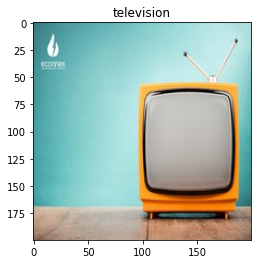

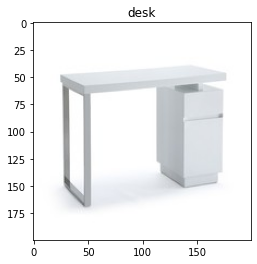

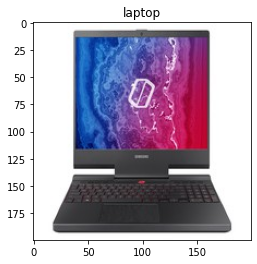

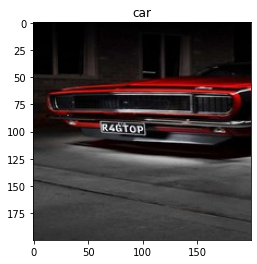

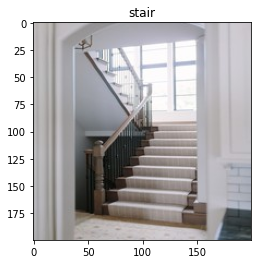

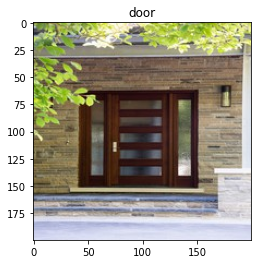

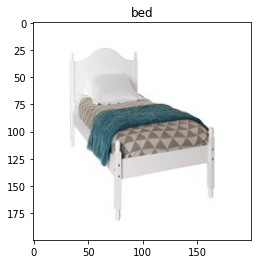

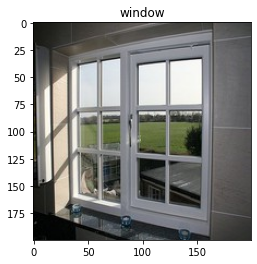

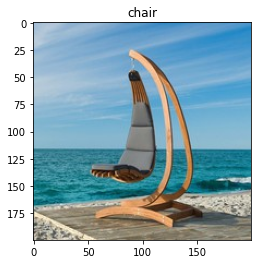

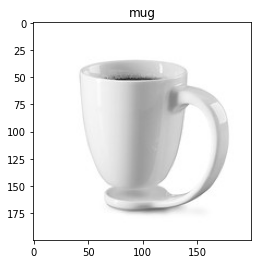

In [148]:
#Printing a picture of every class
dir1 = '../input/blind-object/dataset/'
for dirname in os.listdir(dir1):
    if dirname!='.DS_Store':
        for filename in os.listdir(dir1+dirname)[:1]:
            if filename.split('.')[1]=='jpg':
                img = cv2.imread(dir1+dirname+'/'+filename)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                plt.imshow(img)
                plt.title(dirname)
                plt.show()

In [4]:
#Saving the directory of correct images in a dataframe along with label
image_id = []
object_type = []
dir1 = '../input/blind-object/dataset/'
for dirname in os.listdir(dir1):
    if dirname!='.DS_Store':
        for filename in os.listdir(dir1+dirname):
            if filename.split('.')[1]=='jpg':
                image_id.append(dir1+dirname+'/'+filename)
                object_type.append(dirname)

In [6]:
image_id

['../input/blind-object/dataset/television/television_187.jpg',
 '../input/blind-object/dataset/television/television_99.jpg',
 '../input/blind-object/dataset/television/television_28.jpg',
 '../input/blind-object/dataset/television/television_69.jpg',
 '../input/blind-object/dataset/television/television_58.jpg',
 '../input/blind-object/dataset/television/television_15.jpg',
 '../input/blind-object/dataset/television/television_114.jpg',
 '../input/blind-object/dataset/television/television_5.jpg',
 '../input/blind-object/dataset/television/television_74.jpg',
 '../input/blind-object/dataset/television/television_120.jpg',
 '../input/blind-object/dataset/television/television_103.jpg',
 '../input/blind-object/dataset/television/television_129.jpg',
 '../input/blind-object/dataset/television/television_195.jpg',
 '../input/blind-object/dataset/television/television_169.jpg',
 '../input/blind-object/dataset/television/television_23.jpg',
 '../input/blind-object/dataset/television/televi

In [7]:
import pandas as pd
df = pd.DataFrame(list(zip(image_id, object_type)),columns = ['ImageID','Type'])

In [8]:
#Randomizing 
df = df.sample(frac=1).reset_index(drop=True)
df

,ImageID,Type
0,../input/blind-object/dataset/laptop/laptop_9.jpg,laptop
1,../input/blind-object/dataset/mug/mug_2.jpg,mug
2,../input/blind-object/dataset/television/telev...,television
3,../input/blind-object/dataset/mug/mug_129.jpg,mug
4,../input/blind-object/dataset/car/car_48.jpg,car
...,...,...
1756,../input/blind-object/dataset/television/telev...,television
1757,../input/blind-object/dataset/laptop/laptop_73...,laptop
1758,../input/blind-object/dataset/window/window_10...,window
1759,../input/blind-object/dataset/desk/desk_26.jpg,desk


In [9]:
inp = df['ImageID']
out = df['Type']

In [10]:
#Splitting the data with train:test as 80:20
train_input,test_input,train_output,test_output = train_test_split(inp,out,random_state = 42,test_size = 0.2,stratify = out)        

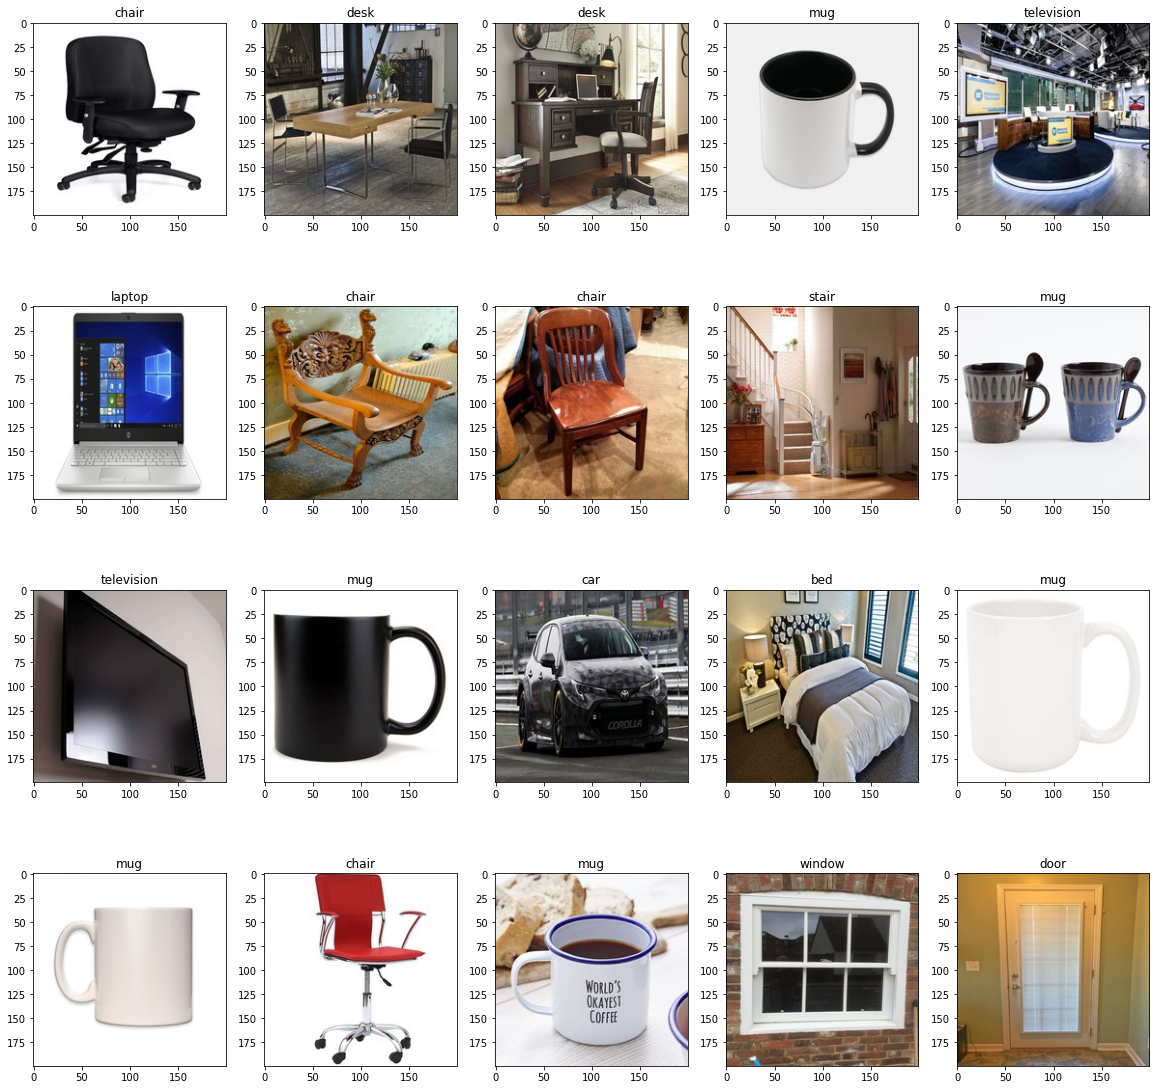

In [13]:
#Printing random images just to check
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
plt.figure(figsize = (20,20))
for i in range(20):
    plt.subplot(4,5,i+1)
    img = cv2.imread(train_input.iloc[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(train_output.iloc[i])

In [14]:
IMG_SIZE = 200
size = (IMG_SIZE,IMG_SIZE)

In [16]:
#Creating an object for imagedatagenerator for generating data in bacthes and augmentation
datagen = ImageDataGenerator(
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = True,
                    fill_mode = 'nearest'
)

In [17]:
train = pd.concat([train_input,train_output],axis=1)

In [18]:
train_generator = datagen.flow_from_dataframe(
                    train,
                    x_col = "ImageID",
                    y_col = "Type",
                    target_size = size,
                    class_mode = "sparse",
                    batch_size = 64,
                    shuffle = True,
                    seed = 42,
                    interpolation = "nearest"
)

Found 1408 validated image filenames belonging to 10 classes.


In [177]:
test = pd.concat([test_input,test_output],axis=1)

In [56]:
valid_generator = datagen.flow_from_dataframe(
                    test,
                    x_col = "ImageID",
                    y_col = "Type",
                    target_size = size,
                    class_mode = "sparse",
                    batch_size = 64,
                    shuffle = False,
                    seed = 42,
                    interpolation = "nearest"
)

Found 353 validated image filenames belonging to 10 classes.


In [21]:
NUM_CLASSES=10

In [22]:
def create_model():
    
    model = models.Sequential()
    #initialize EfficientNetB0 model with input shape as (224,224,3)
    model.add(EfficientNetB0(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet'))
    model.add(layers.MaxPool2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(NUM_CLASSES, activation = 'softmax'))
    
    return model

In [24]:
model = create_model()

16711680/16705208 [==============================] - 0s 0us/step


In [25]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [26]:
#Trying with 30 epochs
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 30)

Epoch 1/30
22/22 [==============================] - 28s 1s/step - loss: 2.2050 - accuracy: 0.6009 - val_loss: 0.9502 - val_accuracy: 0.6912
Epoch 2/30
22/22 [==============================] - 24s 1s/step - loss: 0.4461 - accuracy: 0.8558 - val_loss: 0.6699 - val_accuracy: 0.8130
Epoch 3/30
22/22 [==============================] - 22s 1s/step - loss: 0.3215 - accuracy: 0.9013 - val_loss: 0.8680 - val_accuracy: 0.7960
Epoch 4/30
22/22 [==============================] - 24s 1s/step - loss: 0.2609 - accuracy: 0.9112 - val_loss: 0.5152 - val_accuracy: 0.8725
Epoch 5/30
22/22 [==============================] - 23s 1s/step - loss: 0.1719 - accuracy: 0.9453 - val_loss: 0.4041 - val_accuracy: 0.8697
Epoch 6/30
22/22 [==============================] - 23s 1s/step - loss: 0.1205 - accuracy: 0.9602 - val_loss: 0.4790 - val_accuracy: 0.9037
Epoch 7/30
22/22 [==============================] - 23s 1s/step - loss: 0.1228 - accuracy: 0.9631 - val_loss: 0.3104 - val_accuracy: 0.9178
Epoch 8/30
22/22 [==

In [27]:
#Trying with 20 epochs and it was final model
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs = 20             
                   )

Epoch 1/20
22/22 [==============================] - 23s 1s/step - loss: 0.1172 - accuracy: 0.9666 - val_loss: 0.7051 - val_accuracy: 0.8385
Epoch 2/20
22/22 [==============================] - 24s 1s/step - loss: 0.1131 - accuracy: 0.9723 - val_loss: 0.7257 - val_accuracy: 0.8329
Epoch 3/20
22/22 [==============================] - 22s 1s/step - loss: 0.1030 - accuracy: 0.9702 - val_loss: 0.4426 - val_accuracy: 0.8924
Epoch 4/20
22/22 [==============================] - 23s 1s/step - loss: 0.0888 - accuracy: 0.9766 - val_loss: 0.6049 - val_accuracy: 0.9008
Epoch 5/20
22/22 [==============================] - 23s 1s/step - loss: 0.1218 - accuracy: 0.9702 - val_loss: 0.4656 - val_accuracy: 0.9008
Epoch 6/20
22/22 [==============================] - 23s 1s/step - loss: 0.1150 - accuracy: 0.9673 - val_loss: 0.5948 - val_accuracy: 0.8867
Epoch 7/20
22/22 [==============================] - 23s 1s/step - loss: 0.0797 - accuracy: 0.9787 - val_loss: 0.6753 - val_accuracy: 0.8924
Epoch 8/20
22/22 [==

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11520)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5898752   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 9,953,453
Trainable params: 9,911,430
Non-trainable params: 42,023
_______________________________________

In [152]:
#Calculating the lenght of test data and batchsize for predictions
nb_validation_samples = len(valid_generator.filenames)
batch_size = valid_generator.batch_size

In [149]:
import numpy as np
pred= model.predict_generator(valid_generator, nb_validation_samples // batch_size) #Predicting the probabilities
predicted_class_indices=np.argmax(pred,axis=1)
labels=(valid_generator.class_indices)
labels2=dict((v,k) for k,v in labels.items())
predictions=[labels2[k] for k in predicted_class_indices]

In [150]:
print('Label Encoding: ',labels)

Label Encoding:  {'bed': 0, 'car': 1, 'chair': 2, 'desk': 3, 'door': 4, 'laptop': 5, 'mug': 6, 'stair': 7, 'television': 8, 'window': 9}


In [169]:
#Generating a list of random numbers from 0 to no of test data for showing prediction results
i = [random.randint(0, nb_validation_samples-1) for iter in range(20)]

Predictions Result

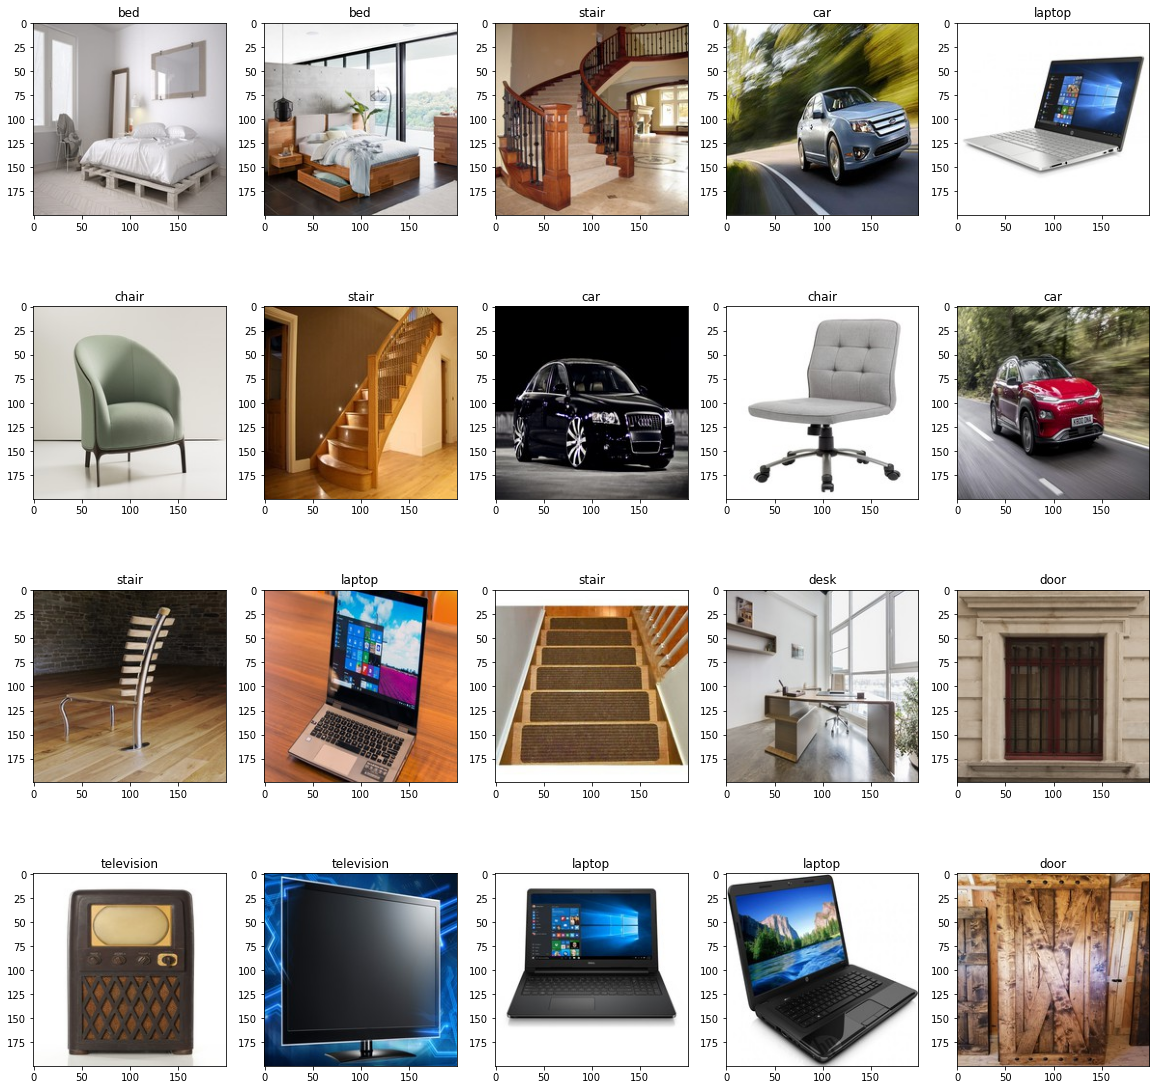

In [168]:
plt.figure(figsize = (20,20))
for j in range(len(i)):
    plt.subplot(4,5,j+1)
    img = cv2.imread(test_input.iloc[i[j]])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(predictions[i[j]])